In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df= pd.DataFrame({
    'x':[12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y':[39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

In [101]:
np.random.seed(200)
k=3
centroids={
    i+1: [np.random.randint(0,80),np.random.randint(0,80)]
    for i in range(k)
}

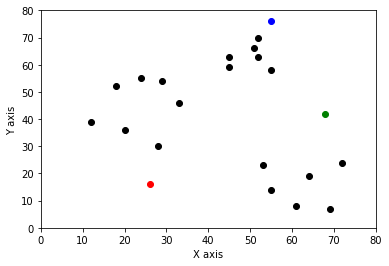

In [102]:
colmap={1:'r', 2:'g',3:'b'}

plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.xlim(0,80)
plt.ylim(0,80)
plt.scatter(df['x'], df['y'], color='k')

for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])

In [110]:
def assignment(df,centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    #print(df.head())
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    print(centroid_distance_cols)
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df=assignment(df,centroids)
#print(df.head())

"""fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()"""

['distance_from_1', 'distance_from_2', 'distance_from_3']


"fig = plt.figure(figsize=(5, 5))\nplt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')\nfor i in centroids.keys():\n    plt.scatter(*centroids[i], color=colmap[i])\nplt.xlim(0, 80)\nplt.ylim(0, 80)\nplt.show()"

'plt.xlim(0, 80)\nplt.ylim(0, 80)\nfor i in old_centroids.keys():\n    old_x = old_centroids[i][0]\n    old_y = old_centroids[i][1]\n    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75\n    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75\n    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])\nplt.show()'

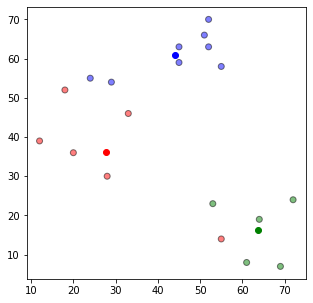

In [114]:
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
"""plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()"""

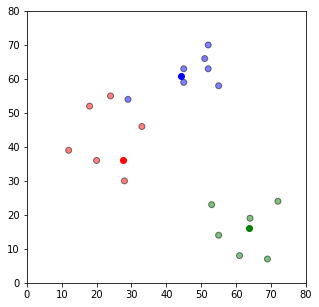

In [24]:
df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']


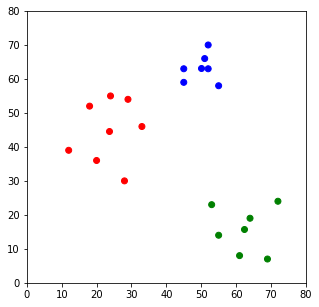

In [117]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'])
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()